In [9]:
############################################################
# Initial setup
############################################################

import pystan
import stan_utility
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plot
import numpy as np

from scipy.special import expit, logit
from jupyterthemes import jtplot
jtplot.style(context='notebook', fscale=1,
            # grid='off'
            
            )

light="#DCBCBC"
light_highlight="#C79999"
mid="#B97C7C"
mid_highlight="#A25050"
dark="#8F2727"
dark_highlight="#7C0000"
green="#00FF00"


<IPython.core.display.Javascript object>


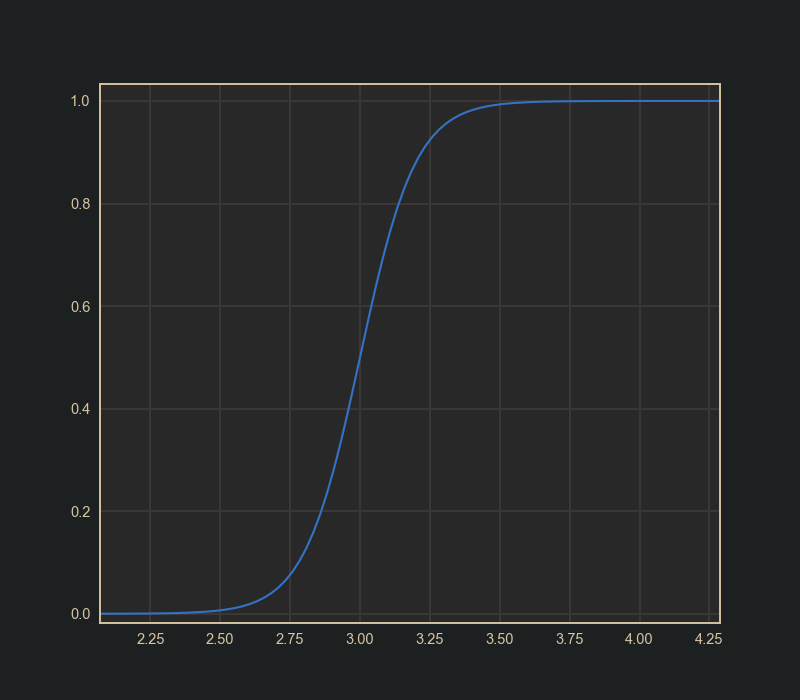

In [17]:
fig, ax = plot.subplots()

x = np.linspace(-5,20,1000)


yp = 10*(x-3)

ax.plot(x, expit(yp))



In [18]:
data

OrderedDict([('x_obs',
              array([ 7.494153  ,  3.85000082,  8.36327216, 10.42852834,  7.65779119,
                      4.52388995,  7.42309111,  4.76141853,  2.82920287,  7.80308606,
                      6.83579317,  8.03321265,  6.34385519,  3.37921732,  4.46767287,
                      9.3586956 ,  5.75060656,  4.18467657,  4.52873   ,  4.97601089,
                      6.66001468,  5.74596133,  6.7899049 ,  2.18790415,  5.64841547,
                      6.12827936,  5.43761803,  5.01759299,  7.06109358,  5.47886874,
                      6.50260563,  4.55670107,  5.11047781,  6.87223861,  7.95895764,
                      8.78051253,  6.25132628,  6.31252606,  6.58933525,  3.94632941,
                      4.66753688,  6.20913138,  2.9437848 ,  8.49314569,  4.78179648,
                      5.21010257,  1.95152307,  5.44520189,  6.12900376,  6.45797342,
                      6.64882835,  7.19860233,  7.81795373,  4.15143293,  4.71598422,
                      2.5782260

In [19]:
############################################################
#
# One-dimensional
#
############################################################

############################################################
# Create data
############################################################

model = stan_utility.compile_model('generate_data.stan')
fit = model.sampling(seed=194838, algorithm='Fixed_param', iter=1, chains=1)

data = dict(N = fit.extract()['N'].astype(np.int64),
            x_obs = fit.extract()['x_obs'][0,:])

pystan.stan_rdump(data, 'selection.data.R')

Using cached StanModel


In [20]:
############################################################
# Fit model
############################################################

data = pystan.read_rdump('selection.data.R')

In [46]:
model = stan_utility.compile_model('selection.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6f44b33c08381e0962518b6bdfe59738 NOW.


In [54]:
fit = model.sampling(data=data, 
                     chains=4,
                     seed=4938483,
                     iter=24000,
                     thin=6,
                     control=dict(adapt_delta=0.9, max_treedepth=12))

In [50]:
# Check diagnostics
stan_utility.check_all_diagnostics(fit)

n_eff / iter looks reasonable for all parameters
Rhat for parameter mu is 1.46299998209!
Rhat for parameter tau is 1.38341654813!
Rhat for parameter Lambda is 1.39713113656!
Rhat for parameter x_tilde_latent[22] is 1.10685596458!
Rhat for parameter x_tilde_latent[23] is 1.12342135238!
Rhat for parameter x_tilde_latent[24] is 1.11552362901!
Rhat for parameter x_tilde_latent[25] is 1.1251958476!
Rhat for parameter x_tilde_latent[26] is 1.13143270737!
Rhat for parameter x_tilde_latent[27] is 1.14460006063!
Rhat for parameter x_tilde_latent[28] is 1.13972206465!
Rhat for parameter x_tilde_latent[29] is 1.14903506282!
Rhat for parameter x_tilde_latent[30] is 1.15586919867!
Rhat for parameter x_tilde_latent[31] is 1.14210645971!
Rhat for parameter x_tilde_latent[32] is 1.15944806492!
Rhat for parameter x_tilde_latent[33] is 1.16966805304!
Rhat for parameter x_tilde_latent[34] is 1.16405691903!
Rhat for parameter x_tilde_latent[35] is 1.17318415381!
Rhat for parameter x_tilde_latent[36] is 1.

<IPython.core.display.Javascript object>


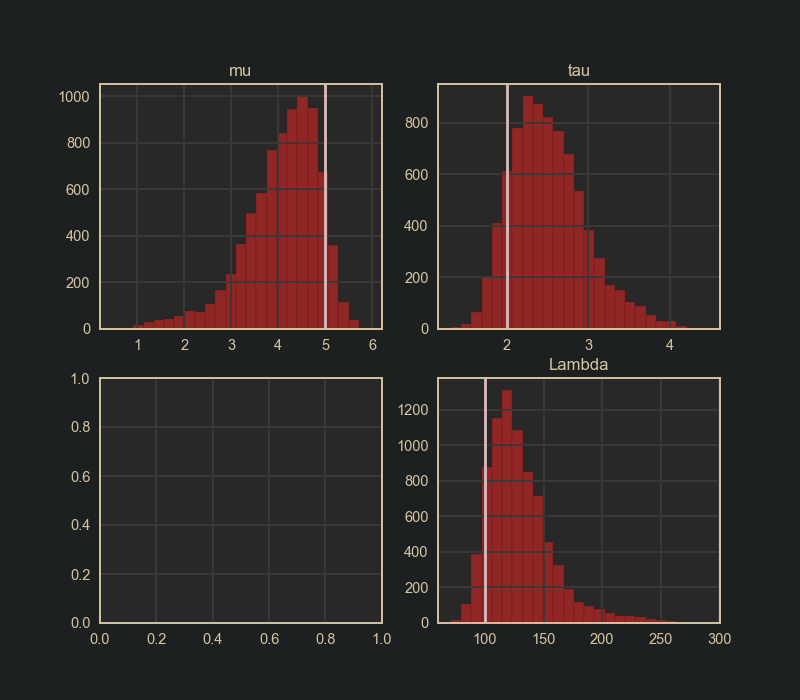

In [55]:
# Default visual summaries
params = fit.extract()

# Plot marginal posteriors
f, axarr = plot.subplots(2, 2)
for a in axarr[0,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')
for a in axarr[1,:]:
    a.xaxis.set_ticks_position('bottom')
    a.yaxis.set_ticks_position('none')

axarr[0, 0].set_title("mu")
axarr[0, 0].hist(params['mu'], bins = 25, color = dark, ec = dark_highlight)
axarr[0, 0].axvline(x=5, linewidth=2, color=light)

axarr[0, 1].set_title("tau")
axarr[0, 1].hist(params['tau'], bins = 25, color = dark, ec = dark_highlight)
axarr[0, 1].axvline(x=2, linewidth=2, color=light)

# axarr[1, 0].set_title("sigma")
# axarr[1, 0].hist(params['sigma'], bins = 25, color = dark, ec = dark_highlight)
# axarr[1, 0].axvline(x=1, linewidth=2, color=light)

axarr[1, 1].set_title("Lambda")
axarr[1, 1].hist(params['Lambda'], bins = 25, color = dark, ec = dark_highlight)
axarr[1, 1].axvline(x=100, linewidth=2, color=light)

#plot.show()

<IPython.core.display.Javascript object>


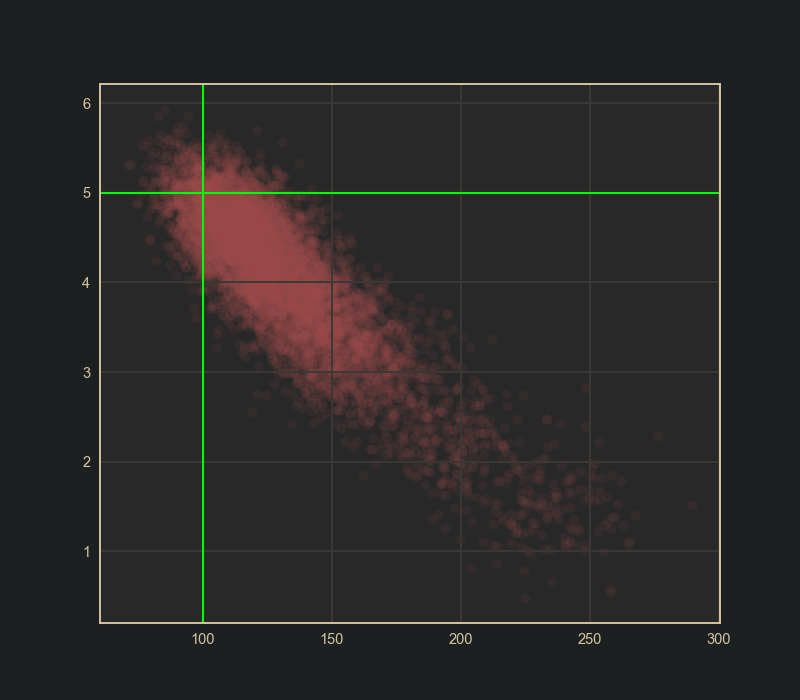

In [59]:

fig, ax = plot.subplots()



ax.scatter(params['Lambda'], params['mu'], color = mid_highlight,
        #   alpha=0.05
        alpha=.1
  
          
          )
ax.axvline(100,color=green)
ax.axhline(5,color=green)

<IPython.core.display.Javascript object>


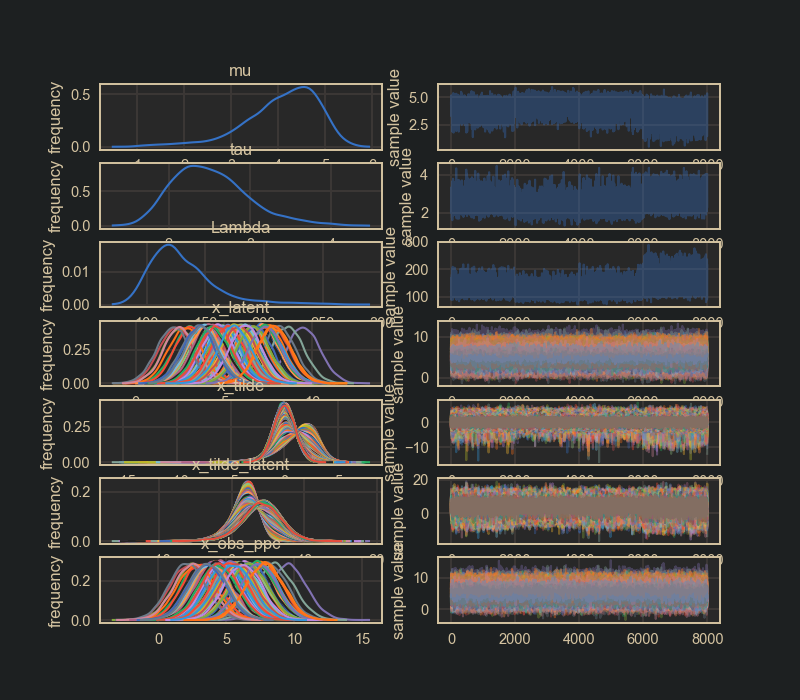

In [57]:
fit.plot();

<IPython.core.display.Javascript object>


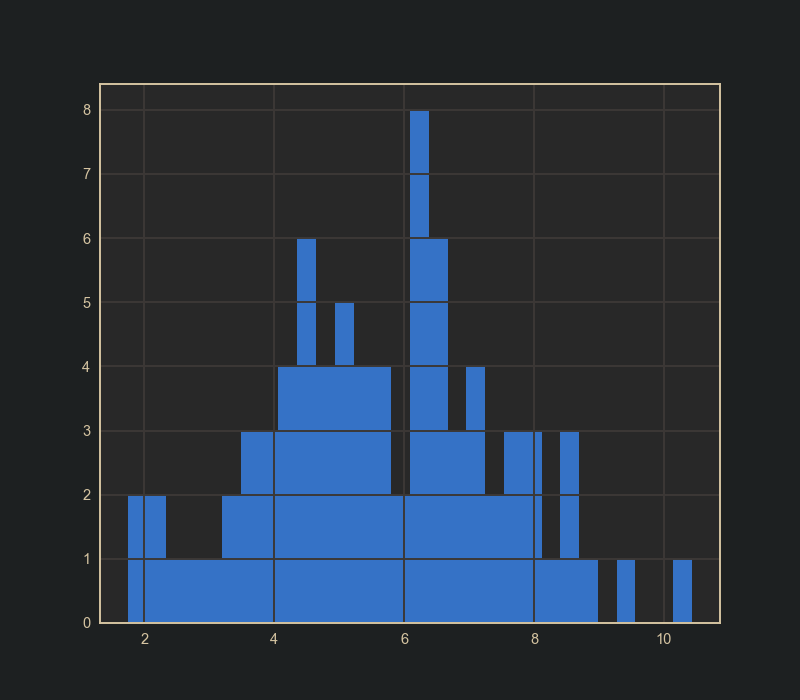

(array([2., 2., 1., 1., 1., 2., 3., 3., 4., 6., 4., 5., 4., 4., 2., 8., 6.,
        3., 4., 2., 3., 3., 1., 3., 1., 0., 1., 0., 0., 1.]),
 array([ 1.75289896,  2.04208661,  2.33127425,  2.6204619 ,  2.90964954,
         3.19883719,  3.48802484,  3.77721248,  4.06640013,  4.35558777,
         4.64477542,  4.93396307,  5.22315071,  5.51233836,  5.80152601,
         6.09071365,  6.3799013 ,  6.66908894,  6.95827659,  7.24746424,
         7.53665188,  7.82583953,  8.11502717,  8.40421482,  8.69340247,
         8.98259011,  9.27177776,  9.5609654 ,  9.85015305, 10.1393407 ,
        10.42852834]),
 <a list of 30 Patch objects>)

In [35]:
fig, ax = plot.subplots()

ax.hist(data['x_obs'],bins=30)